# Image Multimodal Search

This notebooks shows some preliminary work on Image Multimodal Search with lavis library. It is mainly meant to explore its capabilities and to decide on future research directions. We package our code into a `misinformation` package that is imported here:

In [1]:
import misinformation
import misinformation.multimodal_search as ms

2023-02-17 15:05:28.944014: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 15:05:29.426294: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/pandriushchenko/anaconda3/envs/misinfo/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-17 15:05:29.426344: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/pandriushchenko/anaconda3/envs/mi

Set an image path as input file path.

In [2]:
images = misinformation.utils.find_files(
    path="../data/images/",
    limit=1000,
)

In [3]:
mydict = misinformation.utils.initialize_dict(images)

In [4]:
mydict

{'100132S_ara': {'filename': '../data/images/100132S_ara.png'},
 '100447_ind': {'filename': '../data/images/100447_ind.png'},
 '100127S_ara': {'filename': '../data/images/100127S_ara.png'},
 '100134S_ara': {'filename': '../data/images/100134S_ara.png'},
 '109257_1_spa': {'filename': '../data/images/109257_1_spa.png'},
 '100130S_ara': {'filename': '../data/images/100130S_ara.png'},
 '100131S_ara': {'filename': '../data/images/100131S_ara.png'},
 '102135S_eng': {'filename': '../data/images/102135S_eng.png'},
 '102435S_2_eng': {'filename': '../data/images/102435S_2_eng.png'},
 'images': {'filename': '../data/images/images.png'},
 '100368_asm': {'filename': '../data/images/100368_asm.png'},
 '100361_asm': {'filename': '../data/images/100361_asm.png'},
 '102141_1_eng': {'filename': '../data/images/102141_1_eng.png'},
 '106958S_por': {'filename': '../data/images/106958S_por.png'},
 '102134S_eng': {'filename': '../data/images/102134S_eng.png'},
 '102133S_eng': {'filename': '../data/images/102

## Indexing and extracting features from images in selected folder

You can choose one of the following models: blip, blip2, albef, clip_base, clip_rn50, clip_vitl14

In [5]:
model_type = 'blip'

In [6]:
(
    model, 
    vis_processors, 
    txt_processors, 
    image_keys, 
    image_names, 
    features_image_stacked
) = ms.MultimodalSearch.parsing_images(mydict,model_type)

The of all images `features_image_stacked` was saved in `saved_features_image.pt`. If you run it once for current model and set of images you do not need to repeat it again. Instead you can load this features with the command:

In [7]:
#features_image_stacked = ms.MultimodalSearch.load_tensors('saved_features_image.pt')

Next, you need to form search queries. You can search either by image or by text. You can search for a single query, or you can search for several queries at once, the computational time should not be much different. The format of the queries is as follows:

In [8]:
search_query3 = [{"text_input": "politician press conference"},
                 {"text_input": "a world map"},
                 {"image":"../data/haos.png"},
                 {"image":"../data/image-34098-800.png"},
                 {"image":"../data/LeonPresserMorocco20032015_600.png"},
                 {"text_input": "a dog"}]

In [9]:
similarity = ms.MultimodalSearch.multimodal_search(mydict, model, vis_processors, txt_processors, model_type, image_keys, features_image_stacked, search_query3);

After launching `multimodal_search` function, the results of each query will be added to the source dictionary.  

In [12]:
mydict['100127S_ara']

{'filename': '../data/images/100127S_ara.png',
 'rank politician press conference': 10,
 'politician press conference': 0.12746289372444153,
 'rank a world map': 0,
 'a world map': 0.22581495344638824,
 'rank ../data/haos.png': 7,
 '../data/haos.png': 0.6927412748336792,
 'rank ../data/image-34098-800.png': 7,
 '../data/image-34098-800.png': 0.6705336570739746,
 'rank ../data/LeonPresserMorocco20032015_600.png': 12,
 '../data/LeonPresserMorocco20032015_600.png': 0.670850396156311,
 'rank a dog': 3,
 'a dog': 0.13919468224048615}

A special function was written to present the search results conveniently. 

'Your search query: politician press conference'

'--------------------------------------------------'

'Results:'

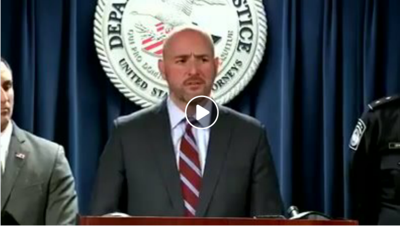

'Rank: 0 Val: 0.19194532930850983'

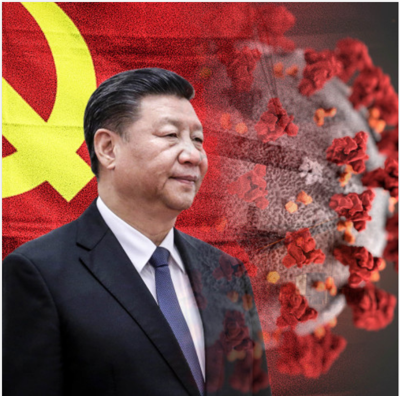

'Rank: 1 Val: 0.18217206001281738'

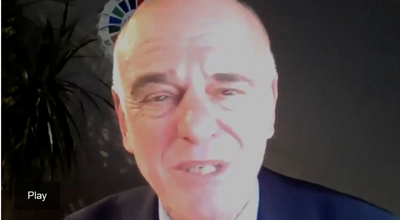

'Rank: 2 Val: 0.17213711142539978'

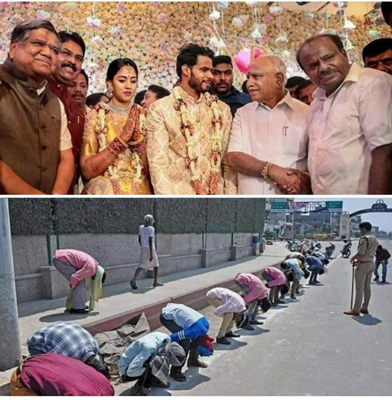

'Rank: 3 Val: 0.17121727764606476'

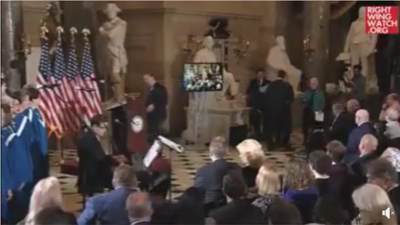

'Rank: 4 Val: 0.16186699271202087'

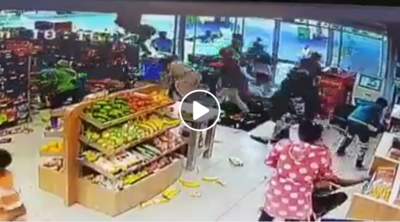

'Rank: 5 Val: 0.16100876033306122'

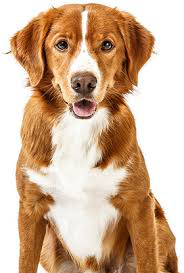

'Rank: 6 Val: 0.14926838874816895'

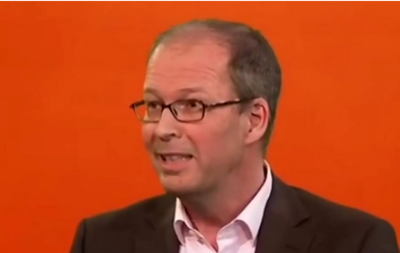

'Rank: 7 Val: 0.14532187581062317'

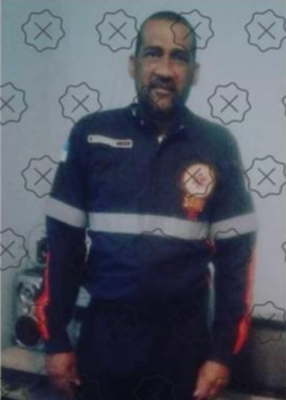

'Rank: 8 Val: 0.1401369422674179'

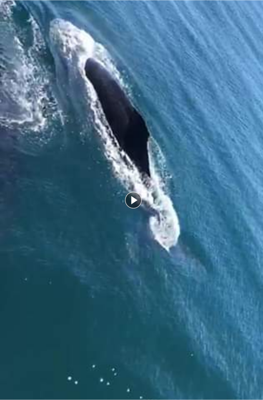

'Rank: 9 Val: 0.12848562002182007'

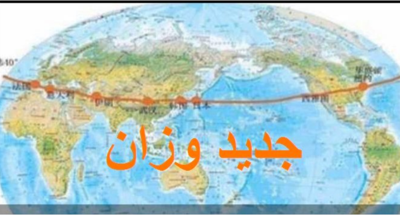

'Rank: 10 Val: 0.12746289372444153'

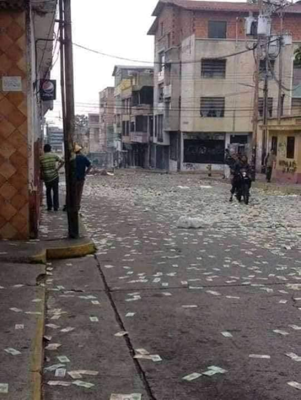

'Rank: 11 Val: 0.11573033034801483'

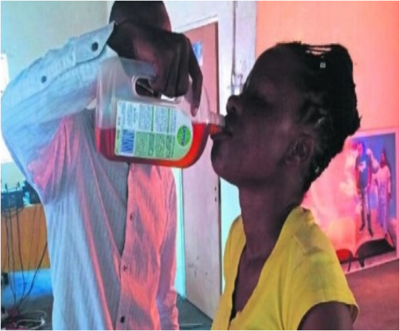

'Rank: 12 Val: 0.11098270118236542'

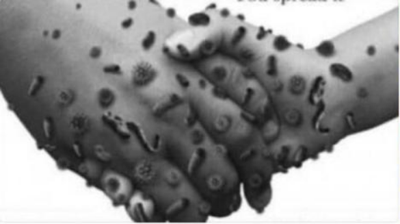

'Rank: 13 Val: 0.10973992943763733'

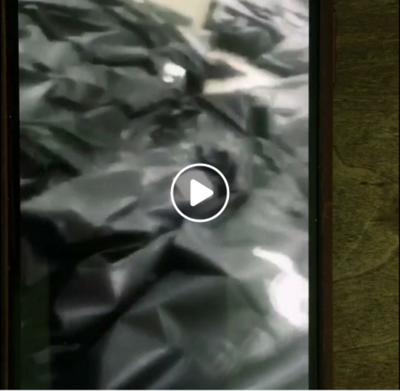

'Rank: 14 Val: 0.10972951352596283'

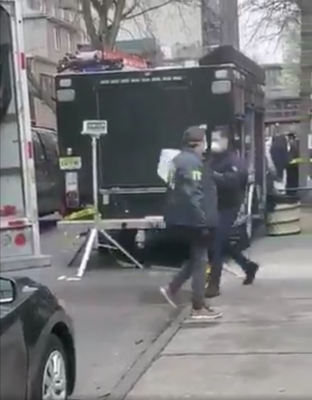

'Rank: 15 Val: 0.10828982293605804'

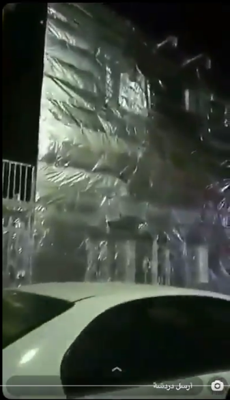

'Rank: 16 Val: 0.10538025945425034'

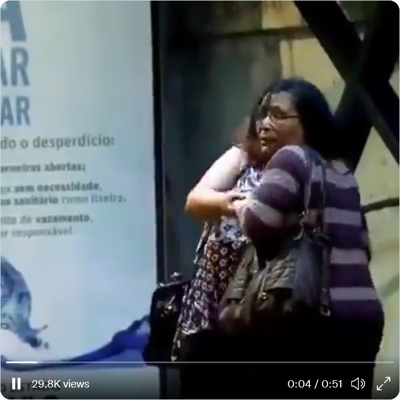

'Rank: 17 Val: 0.10346324741840363'

In [14]:
ms.MultimodalSearch.show_results(mydict,search_query3[0])

## Save searhing results to csv

Convert the dictionary of dictionarys into a dictionary with lists:

In [15]:
outdict = misinformation.utils.append_data_to_dict(mydict)
df = misinformation.utils.dump_df(outdict)

Check the dataframe:

In [17]:
df.head(10)

,filename,rank politician press conference,politician press conference,rank a world map,a world map,rank ../data/haos.png,../data/haos.png,rank ../data/image-34098-800.png,../data/image-34098-800.png,rank ../data/LeonPresserMorocco20032015_600.png,../data/LeonPresserMorocco20032015_600.png,rank a dog,a dog
0,../data/images/100132S_ara.png,16,0.105380,9,0.119007,6,0.702348,3,0.690095,13,0.670214,5,0.134133
1,../data/images/100447_ind.png,12,0.110983,14,0.102421,12,0.679339,11,0.650879,11,0.671791,14,0.111688
2,../data/images/100127S_ara.png,10,0.127463,0,0.225815,7,0.692741,7,0.670534,12,0.670850,3,0.139195
3,../data/images/100134S_ara.png,17,0.103463,4,0.134616,15,0.662454,10,0.650921,15,0.641210,1,0.154520
4,../data/images/109257_1_spa.png,2,0.172137,16,0.102186,8,0.689166,2,0.696316,3,0.740258,4,0.134352
5,../data/images/100130S_ara.png,15,0.108290,15,0.102391,0,0.757556,8,0.670440,5,0.700282,8,0.129405
6,../data/images/100131S_ara.png,4,0.161867,17,0.093437,4,0.713303,6,0.671746,0,0.753137,13,0.116932
7,../data/images/102135S_eng.png,5,0.161009,6,0.126290,10,0.684293,4,0.678847,10,0.683767,16,0.097277
8,../data/images/102435S_2_eng.png,7,0.145322,8,0.120092,16,0.658946,5,0.672153,2,0.741612,2,0.141157
9,../data/images/images.png,6,0.149268,2,0.143452,13,0.673048,0,0.752783,14,0.655141,0,0.220832


Write the csv file:

In [18]:
df.to_csv("./data_out.csv")